In [1]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from pathlib import Path

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\Dell XPS\anaconda3\envs\pyvizenv2\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Read in the csv Top Profitable Stock Prices "top_prof_stock_prices.csv"
top_prof_stock_prices_df = Path("resources/top_prof_stock_prices.csv")


# # Adjust the df to display the required data
top_prof_stock_prices_df = pd.read_csv(top_prof_stock_prices_df, index_col="date", parse_dates=True, infer_datetime_format=True)
top_prof_stock_prices_df.sort_index(inplace = True)

top_prof_stock_prices_df.head()

,SP,MKTX,PNC,TDY,NFLX,SPGI,IPGP,MSCI,NOW,BIO,AMZN
date,,,,,,,,,,,
2015-07-27,25.26,97.95,97.51,102.67,106.43,99.59,79.86,65.73,76.34,146.45,531.41
2015-07-28,25.57,97.66,98.14,103.67,106.90,98.40,89.71,66.00,78.63,149.45,526.03
2015-07-29,25.77,98.16,98.55,104.99,107.08,101.48,93.30,66.91,77.98,150.46,529.00
2015-07-30,25.83,97.07,98.67,103.70,111.56,102.84,92.56,67.97,81.03,150.81,536.76
2015-07-31,26.15,97.80,98.18,103.67,114.31,101.75,92.22,68.16,80.50,150.74,536.15


In [3]:
#calculate 'pct_change' function to calculate daily returns
daily_returns = top_prof_stock_prices_df.pct_change()
daily_returns.head()


,SP,MKTX,PNC,TDY,NFLX,SPGI,IPGP,MSCI,NOW,BIO,AMZN
date,,,,,,,,,,,
2015-07-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-28,0.012272,-0.002961,0.006461,0.009740,0.004416,-0.011949,0.123341,0.004108,0.029997,0.020485,-0.010124
2015-07-29,0.007822,0.005120,0.004178,0.012733,0.001684,0.031301,0.040018,0.013788,-0.008267,0.006758,0.005646
2015-07-30,0.002328,-0.011104,0.001218,-0.012287,0.041838,0.013402,-0.007931,0.015842,0.039113,0.002326,0.014669
2015-07-31,0.012389,0.007520,-0.004966,-0.000289,0.024650,-0.010599,-0.003673,0.002795,-0.006541,-0.000464,-0.001136


In [4]:
#calculate mean of daily returns
avg_daily_return = daily_returns.mean()
avg_daily_return

SP     -0.000014
MKTX    0.001499
PNC     0.000264
TDY     0.001057
NFLX    0.001541
SPGI    0.001155
IPGP    0.000995
MSCI    0.001594
NOW     0.001666
BIO     0.001159
AMZN    0.001558
dtype: float64

In [5]:
#calculate the standard deviation of daily returns for portfolio
std_dev_daily_return = daily_returns.std()
std_dev_daily_return

SP      0.024119
MKTX    0.019698
PNC     0.019529
TDY     0.018821
NFLX    0.026188
SPGI    0.017602
IPGP    0.027010
MSCI    0.019343
NOW     0.024486
BIO     0.018000
AMZN    0.018964
dtype: float64

In [6]:
## Determine Portfolio Weights
pfolio_data = Path("resources/top_profitable_stock.csv")
pfolio_df = pd.read_csv(
    pfolio_data, index_col="symbol"
)
pfolio_profit_sum = sum(pfolio_df['profit'])
pfolio_df= pfolio_df['profit'] / pfolio_profit_sum
pfolio_df

symbol
AMZN    0.245613
BIO     0.159114
NOW     0.097728
MSCI    0.095945
IPGP    0.082201
SPGI    0.076612
NFLX    0.075067
TDY     0.056476
PNC     0.056361
MKTX    0.054884
Name: profit, dtype: float64

## Monte Carlo Simulation with the results saved to DataFrame

In [8]:
# Set number of simulations, trading days, and get last closing price of portfolio
num_simulations = 1000
num_trading_days = 252*15

# Set last closing prices of stocks within portfolio
amzn_last_price = top_prof_stock_prices_df["AMZN"][-1]
bio_last_price = top_prof_stock_prices_df["BIO"][-1]
now_last_price = top_prof_stock_prices_df["NOW"][-1]
msci_last_price = top_prof_stock_prices_df["MSCI"][-1]
ipgp_last_price = top_prof_stock_prices_df["IPGP"][-1]
spgi_last_price = top_prof_stock_prices_df["SPGI"][-1]
nflx_last_price = top_prof_stock_prices_df["NFLX"][-1]
tdy_last_price = top_prof_stock_prices_df["TDY"][-1]
pnc_last_price = top_prof_stock_prices_df["PNC"][-1]
mktx_last_price = top_prof_stock_prices_df["MKTX"][-1]

# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_price_df = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

# Run the simulation of projecting stock prices for the next trading year, `1000` times
for n in range(num_simulations):

    # Initialize the simulated prices list with the last closing price of portfolio
    simulated_amzn_prices = [amzn_last_price]
    simulated_bio_prices = [bio_last_price]
    simulated_now_prices = [now_last_price]
    simulated_msci_prices = [msci_last_price]
    simulated_ipgp_prices = [ipgp_last_price]
    simulated_spgi_prices = [spgi_last_price]
    simulated_nflx_prices = [nflx_last_price]
    simulated_tdy_prices = [tdy_last_price]
    simulated_pnc_prices = [pnc_last_price]
    simulated_mktx_prices = [mktx_last_price]
    
    # Simulate the returns for 252 days
    for i in range(num_trading_days):
        
        # Calculate the simulated price using the last price within the list
        simulated_amzn_price = simulated_amzn_prices[-1] * (1 + np.random.normal(avg_daily_return["AMZN"], std_dev_daily_return["AMZN"]))
        simulated_bio_price = simulated_bio_prices[-1] * (1 + np.random.normal(avg_daily_return["BIO"], std_dev_daily_return["BIO"]))
        simulated_now_price = simulated_now_prices[-1] * (1 + np.random.normal(avg_daily_return["NOW"], std_dev_daily_return["NOW"]))
        simulated_msci_price = simulated_msci_prices[-1] * (1 + np.random.normal(avg_daily_return["MSCI"], std_dev_daily_return["MSCI"]))
        simulated_ipgp_price = simulated_ipgp_prices[-1] * (1 + np.random.normal(avg_daily_return["IPGP"], std_dev_daily_return["IPGP"]))
        simulated_spgi_price = simulated_spgi_prices[-1] * (1 + np.random.normal(avg_daily_return["SPGI"], std_dev_daily_return["SPGI"]))
        simulated_nflx_price = simulated_nflx_prices[-1] * (1 + np.random.normal(avg_daily_return["NFLX"], std_dev_daily_return["NFLX"]))
        simulated_tdy_price = simulated_tdy_prices[-1] * (1 + np.random.normal(avg_daily_return["TDY"], std_dev_daily_return["TDY"]))
        simulated_pnc_price = simulated_pnc_prices[-1] * (1 + np.random.normal(avg_daily_return["PNC"], std_dev_daily_return["PNC"]))
        simulated_mktx_price = simulated_mktx_prices[-1] * (1 + np.random.normal(avg_daily_return["MKTX"], std_dev_daily_return["MKTX"]))
        
        # Append the simulated price to the list
        simulated_amzn_prices.append(simulated_amzn_price)
        simulated_bio_prices.append(simulated_bio_price)
        simulated_now_prices.append(simulated_now_price)
        simulated_msci_prices.append(simulated_msci_price)
        simulated_ipgp_prices.append(simulated_ipgp_price)
        simulated_spgi_prices.append(simulated_spgi_price)
        simulated_nflx_prices.append(simulated_nflx_price)
        simulated_tdy_prices.append(simulated_tdy_price)
        simulated_pnc_prices.append(simulated_pnc_price)
        simulated_mktx_prices.append(simulated_mktx_price)

    
    # Append a simulated prices of each simulation to DataFrame
    simulated_price_df["AMZN prices"] = pd.Series(simulated_amzn_prices)
    simulated_price_df["BIO prices"] = pd.Series(simulated_bio_prices)
    simulated_price_df["NOW prices"] = pd.Series(simulated_now_prices)
    simulated_price_df["MSCI prices"] = pd.Series(simulated_msci_prices)
    simulated_price_df["IPGP prices"] = pd.Series(simulated_ipgp_prices)
    simulated_price_df["SPGI prices"] = pd.Series(simulated_spgi_prices)
    simulated_price_df["NFLX prices"] = pd.Series(simulated_nflx_prices)
    simulated_price_df["TDY prices"] = pd.Series(simulated_tdy_prices)
    simulated_price_df["PNC prices"] = pd.Series(simulated_pnc_prices)
    simulated_price_df["MKTX prices"] = pd.Series(simulated_mktx_prices)
     
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = simulated_price_df.pct_change()
    
    # Set the portfolio weights (24.56% AMZN; 15.91% BIO; 9.77% NOW, 9.59% MSCI; 8.22% IPGP; 7.66% SPGI; 7.50% NFLX; 5.64% TDY; 5.63% PNC; 5.48% MKTX)
    weights = [ 0.245613,0.159114,0.097728,0.095945,0.082201,0.076612,0.075067,0.056476,0.056361,0.054884]
 
    # Use the `dot` function with the weights to multiply weights with each column"s simulated daily returns
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[n] = (1 + portfolio_daily_returns.fillna(0)).cumprod()

# Print records from the DataFrame
portfolio_cumulative_returns.head()


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999882,1.007470,0.996589,1.010975,1.007699,1.000847,1.016218,0.999435,0.994630,0.991548,...,0.996012,0.997424,1.006611,0.993461,1.000033,0.995104,1.011990,1.019510,0.994099,0.998198
2,1.003323,1.009735,0.998305,1.007656,1.009507,0.986372,1.006747,0.986868,1.005988,1.000475,...,0.989933,1.009848,1.016520,0.994491,0.998242,0.994766,1.028031,1.008459,0.982918,1.007066
3,1.004285,1.008930,0.997646,1.016942,0.998593,0.988353,0.999505,0.995250,1.007469,1.008006,...,0.985490,1.006729,1.007697,0.991313,1.000287,0.992474,1.023874,1.012413,0.978863,1.014667
4,0.999717,1.000504,0.991664,1.028100,1.003718,0.995308,0.993163,0.998344,1.031401,1.011344,...,1.006135,1.008736,1.002907,1.000518,1.003124,0.993447,1.026113,0.997710,0.987034,1.005864


In [9]:
### Plot the Multiple Simulations of Potential Cumulative Portfolio Returns over the Next 15 Years (252 * 15 Trading Days)

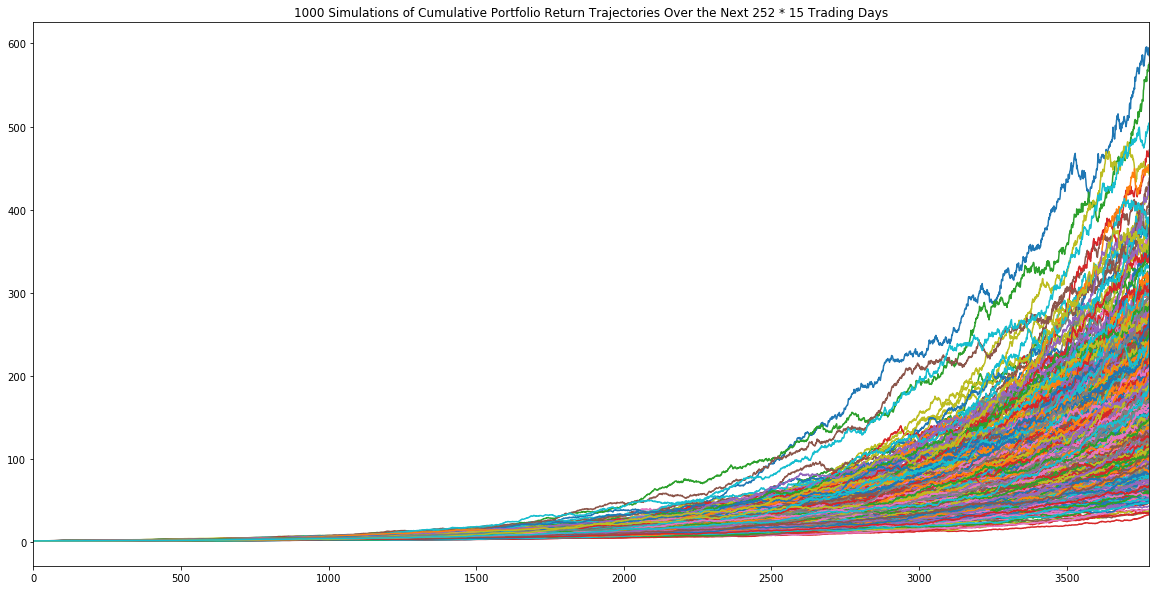

In [12]:
# Use the `plot` function to plot `1000` simulations of the potential trajectories of the portfolio based on 252 * 15 trading days
plot_title = f"{n+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 252 * 15 Trading Days"
portfolio_cumulative_returns.plot(legend=None, title=plot_title,figsize=(20,10))

In [13]:
## Sharpe Ratio Analysis for the individual portfolio stocks

In [14]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (top_prof_stock_prices_df.mean() * 252) / (top_prof_stock_prices_df.std() * np.sqrt(252))
sharpe_ratios

SP      72.127191
MKTX    34.884803
PNC     81.758430
TDY     35.051004
NFLX    32.681965
SPGI    42.617699
IPGP    44.794375
MSCI    30.451131
NOW     28.074362
BIO     44.149173
AMZN    35.585447
dtype: float64

In [91]:
#savings results into a dataframe
sharpe_ratio_data = [
    ['SP','72.127191'],
    ['MKTX','34.884803'],
    ['PNC','81.758430'],
    ['TDY','35.051004'],
    ['NFLX','32.681965'],
    ['SPGI','42.617699'],
    ['IPGP','44.794375'],
    ['MSCI','30.451131'],
    ['NOW','28.074362'],
    ['BIO','44.149173'],
    ['AMZN','35.585447'],
    ]

df_sharpe_ratios = pd.DataFrame(sharpe_ratio_data, columns = ['stock', 'sharpe_ratio'])

print(df_sharpe_ratios)

   stock sharpe_ratio
0     SP    72.127191
1   MKTX    34.884803
2    PNC    81.758430
3    TDY    35.051004
4   NFLX    32.681965
5   SPGI    42.617699
6   IPGP    44.794375
7   MSCI    30.451131
8    NOW    28.074362
9    BIO    44.149173
10  AMZN    35.585447


In [96]:
import plotly.express as px

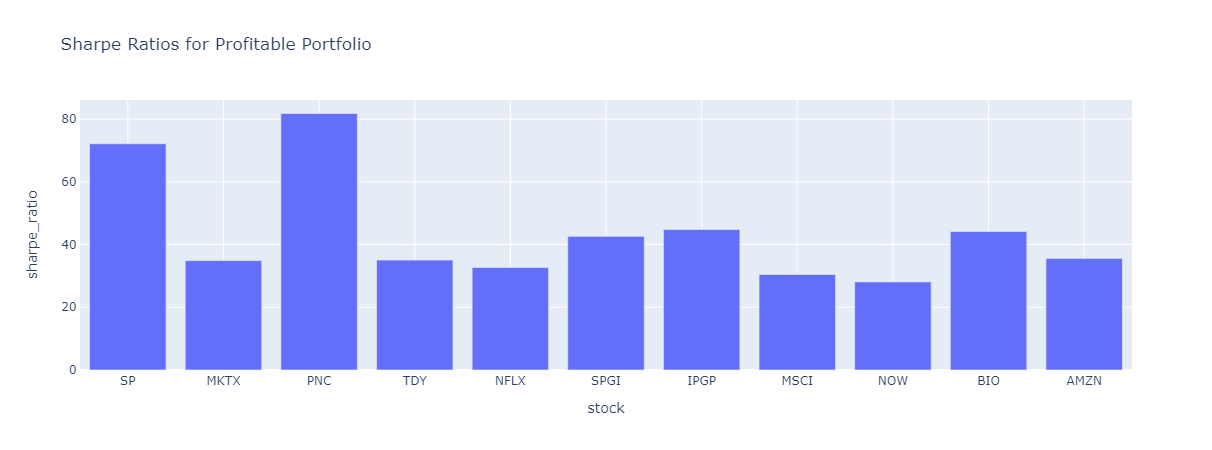

In [100]:
#Graphing sharpe ratios
fig = px.bar(df_sharpe_ratios,x='stock', y='sharpe_ratio', title="Sharpe Ratios for Profitable Portfolio")
fig.show()

In [104]:
#calculating negative portfolio returns for sortino ratio
negative_portfolio_returns = portfolio_daily_returns.where(lambda x : x < 0).dropna()
negative_portfolio_returns.head()

portfolio_down_std = negative_portfolio_returns.std()
print(portfolio_down_std)

0.004116001848038037


## Portfolio's Sortino Ratio & Sharpe Ratio

In [46]:
risk_free_rate = 0.0275
sortino_ratio = (portfolio_daily_returns.mean() - risk_free_rate) / portfolio_down_std
sharpe_ratio = (portfolio_daily_returns.mean() - risk_free_rate) / portfolio_daily_returns.std()

##Sortin
print(f"Sortino ratio is {sortino_ratio}")
print(f"Sharpe ratio is {sharpe_ratio}")

Sortino ratio is -6.338238649986802
Sharpe ratio is -3.6318774824566202
